In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 输入实验数据，无阻尼数据，f——频率（Hz），U——电压（V）
f1 = np.array([258.306, 258.946, 259.406, 260.046, 260.156, 260.186, 260.206, 260.226, 260.246, 260.256, 260.276, 260.311,
               260.341, 260.371, 260.401, 260.441, 260.471, 260.521, 260.581, 260.681, 261.381, 261.681, 262.381])
U1 = np.array([0.068, 0.085, 0.111, 0.291, 0.455, 0.550, 0.634, 0.750, 0.918, 1.044, 1.314, 1.524,
               1.350, 1.066, 0.815, 0.594, 0.480, 0.356, 0.268, 0.182, 0.030, 0.024, 0.012])
# 有阻尼数据
f2 = np.array([258.132, 258.632, 259.132, 259.332, 259.632, 259.832, 259.932, 260.032, 260.072, 260.102, 260.112,
               260.132, 260.152, 260.222, 260.272, 260.322, 260.372, 260.672, 261.072, 261.572, 262.072])

U2 = np.array([0.069, 0.078, 0.103, 0.125, 0.169, 0.254, 0.354, 0.604, 0.867, 1.176, 1.251,
               1.337, 1.264, 0.757, 0.521, 0.387, 0.298, 0.108, 0.047, 0.022, 0.014])

# 对数据进行平滑处理，不然matplot画出来的图是折线的（取了300个点）
xnew = np.linspace(f1.min(), f1.max(), 300)
U1_smooth = interp1d(f1, U1, kind='cubic')(xnew)

xnew2 = np.linspace(f2.min(), f2.max(), 300)
U2_smooth = interp1d(f2, U2, kind='cubic')(xnew2)


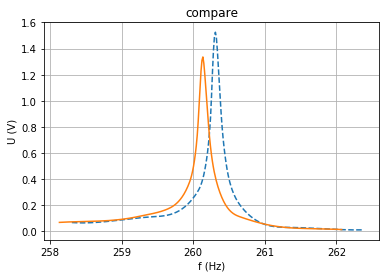

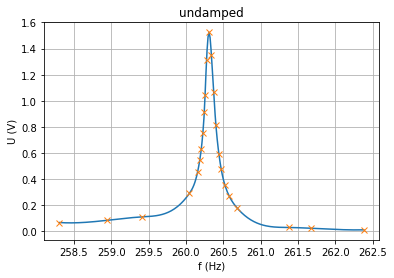

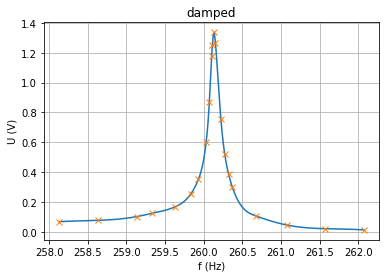

In [2]:
# 先在一张图里对比两种数据
fig, ax = plt.subplots()
ax.plot(xnew, U1_smooth, '--', xnew2, U2_smooth, '-')
ax.set(xlabel='f (Hz)', ylabel='U (V)', title='compare')  # 如果想设置标题不能显示中文，这就很。。。
ax.grid()

# 单独分析，无阻尼
fig1, ax1 = plt.subplots()
ax1.plot(xnew, U1_smooth, f1, U1, 'x')
ax1.set(xlabel='f (Hz)', ylabel='U (V)', title='undamped')
ax1.grid()

# 有阻尼
fig2, ax2 = plt.subplots()
ax2.plot(xnew2, U2_smooth, f2, U2, 'x')
ax2.set(xlabel='f (Hz)', ylabel='U (V)', title='damped')
ax2.grid()

# 显示并保存图片
plt.show()
fig.savefig('compare.png')
fig1.savefig('undamped.png')
fig2.savefig('damped.png')

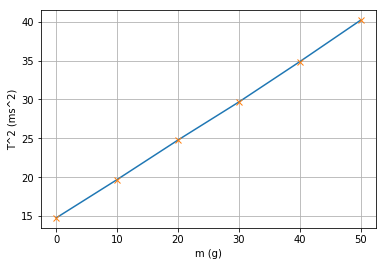

0.5075069216219136 14.637103802124848


In [7]:
# 共振频率（f）与音叉所加质量（m）关系图
# 严格来说应该用最小二乘法来绘图，但老师也说了这个实验精度能达到很高，所以我的点好像都在线上，就不麻烦了。
m = np.array([0, 10, 20, 30, 40, 50])  # 质量m(g)
f = np.array([260.311, 225.381, 200.911, 183.581, 169.371, 157.721])  # 共振频率f(Hz)

# 处理数据
T = 1000 / f  # 将频率（Hz）转换为周期（ms），
T2 = T ** 2  # 求T的平方

# 坐标图参数设置
fig3, ax3 = plt.subplots()
ax3.plot(m, T2, m, T2, 'x')
ax3.set(xlabel='m (g)', ylabel='T^2 (ms^2)')
ax3.grid()

# 显示并保存图片
plt.show()
fig3.savefig('T^2-m关系图')

# 用最小二乘法计算k和m
k = ((m - m.mean()) * (T2 - T2.mean())).sum() / (m.var() * m.size)
m = T2.mean() - k * m.mean()
print(k, m)